<a href="https://colab.research.google.com/github/UTDataMining/2022A/blob/main/project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プロジェクト

In [2]:
import pandas as pd
import numpy as  np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
%matplotlib inline
# 必要なモジュールがあれば適宜追加してください

あなたは酒造会社のデータ分析部門の責任者です。ワインの理化学検査結果からワインの品質を予測するシステムの検討を行ってほしいとの依頼をCTO（最高技術責任者）から受けました。

Suppose you are the head of the data analysis department of a Sake brewing company, the CTO (Chief Technical Officer) asked you to investigate introducing a system that would predict the quality of wine based on the results of chemical inspections.

部門の新人で最近データ分析を勉強した部下が次のような分析を行い、実データ（UCI Machine Learning Repositoryに公開されているワインの品質データセットを使います）を用いて、ワインの理化学検査結果に基づく特徴量からワインの品質予測を以下のように試行しました。

One of the newly hired employees at your department, who have recently learned data analysis, conducted the following analysis. Using actual data (from the wine quality data set in the UCI Machine Learning Repository), he tried to predict the quality of wine based on the features derived from the chemical inspection results as follows.


以下では、***白ワイン***のデータセットを使用する。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In the follwoing, we use the wine quality dataset for **white wine**. (Note that it is not the dataset for red wine). 

各ワインのデータは以下の11種類の特徴量からなる。

Each data point consists of the following 11 features.

- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

各ワインには0から10の品質スコアが付与されており、11種類の特徴量を元にワインの品質を高品質（ワインのqualityが6以上）、低品質（ワインのqualityが6未満）の2値にして予測する2クラス分類問題を考える。

Each wine is assigned a quality score ranging from 0 to 10. Consider a binary classification problem in which we predict the wine quality as high quality (wine quality is 6 or higher) or low quality (wine quality is less than 6) based on the 11 features.

In [3]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/project/winequality-white.csv

--2022-12-25 07:55:52--  https://raw.githubusercontent.com/UTDataMining/2022A/master/project/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.004s  

2022-12-25 07:55:52 (68.4 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [4]:
# 白ワインデータセットの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";")

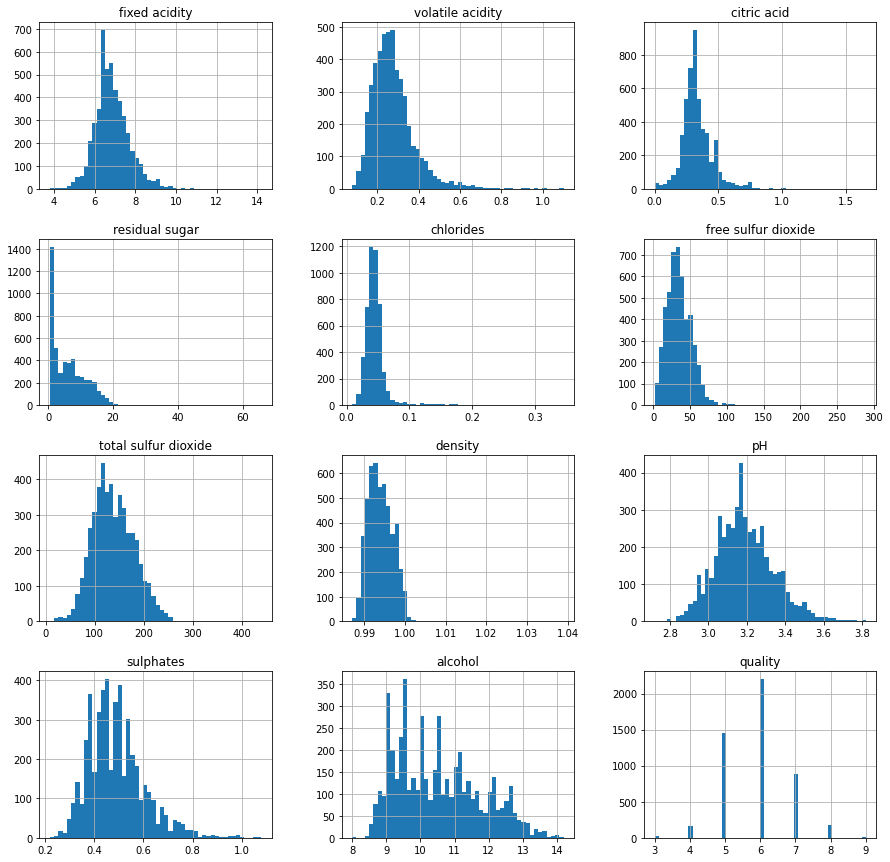

In [22]:
# 特徴量の分布
wine.hist(bins=50, figsize=(15,15));

In [20]:
# 特徴量間の相関
wine.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [17]:
# 入力データ
X = wine[ ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

# 正解ラベルを1（高品質：ワインのqualityが6以上）か0（低品質：ワインのqualityが6未満）とする
y=wine['quality'].values
y = (y>=6).astype(int) 
print(np.sum(y==1, axis=0)) # 高品質ワインデータの数
print(np.sum(y==0, axis=0)) # 低品質ワインデータの数

3258
1640


In [18]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

In [19]:
# ロジスティック回帰モデル
lr=LogisticRegression(solver='liblinear',  multi_class='auto') 
lr.fit(X_train, y_train) # 訓練データで学習
y_pred = lr.predict(X_test) # テストデータで予測

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[158 170]
 [ 76 576]]
0.7489795918367347
0.7721179624664879
0.8834355828220859
0.8240343347639485


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
weight,-0.195978,-5.559322,-0.082886,0.058199,-0.425939,0.008923,-0.001946,-2.788865,-0.570979,1.081777,0.977463


部下は、この分析を元にワインの品質予測の（2クラス分類としての）accuracyは75%となりそうです、と報告してきました。

Based on this experiment, your subordinate reported that, the accuracy of the wine quality prediction (as a binary classification) would be about 75%.


## 課題
**上記のワインの理化学検査結果からの品質予測について、あなた自身で（部下に対して模範となるような）分析に行い、その分析の過程と結果についてレポートとしてまとめたものを作成して提出してください。**

- レポートは定められた様式に従って図表を含めて最大3ページまでとし、少なくとも1ページ以上は本文で構成してください（図表だけを貼り付けただけで説明がないものは不可）。
- レポートと合わせて分析に用いたコードも提出してください。

授業で未習の内容を取り入れてもらっても構いませんが、それを持って大きく加点することはありません。むしろ、授業で学んだ内容を元にまず、適切に分析を行っているか、その上で独自の創意工夫があるか、を主に評価します。

Conduct your own analysis (as an example to your subordinate) of the wine quality prediction based on the chemical inspection results and summarize a report describing the process and results of your analysis.
- The report should be no more than three pages long, including figures and tables, and at least one page should consist of a text part (the report with only figures and tables is not accepted).
- Also submit the codes used in the analysis together with the report.

You may use advanced topics that you have not yet learned in the class. However, it won't always lead to significant marks. The evaluation is rather based on whether you have first conducted relevant analysis based on what you have learned in the class, and whether you have any original and creative ideas on top of that.